In [1]:
using Pkg
Pkg.activate("..")

  Activating project at `c:\Users\coope\OneDrive\Documents\Uni\Phylogenetics_coding\JMMenura`

In [2]:
include("../src/JMMenura.jl")

Main.JMMenura

In [3]:
using .JMMenura
using Phylo, Distributions, Random, Plots, LinearAlgebra, PosDefManifold
Random.seed!(1)

TaskLocalRNG()

## Simulation setup

### Tree setup

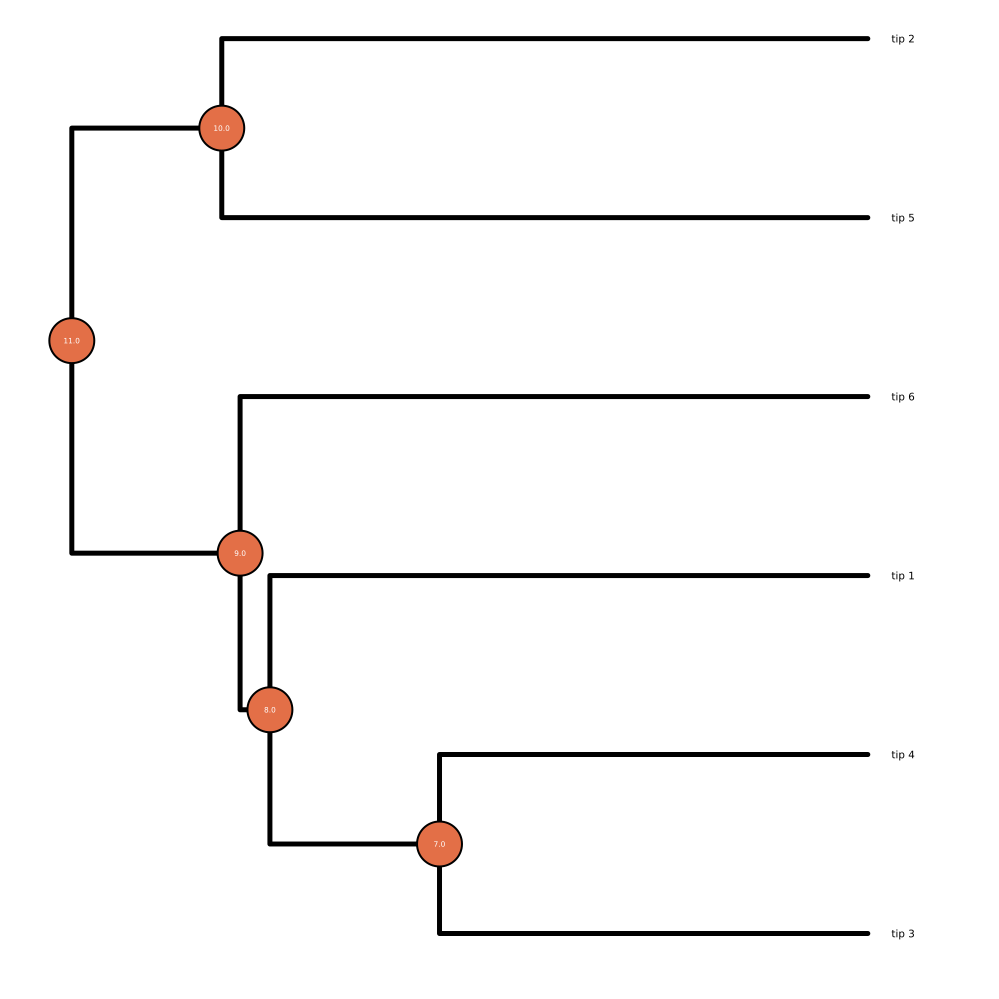

In [4]:
# number of traits
n = 7

# Creating tree
tree_type = Ultrametric(6)
Random.seed!(1)
tree1 = rand(tree_type)
time_tot = 1.0
tspan = (0.0, time_tot)

plot_labelled(tree1)

### Parameter setup

In [5]:
# G matrix
P0 = cor(rand(Wishart(100, Matrix(1I, n, n)  )))

7×7 Matrix{Float64}:
  1.0        -0.179186   -0.147274   …  -0.332079   -0.229666    0.0101498
 -0.179186    1.0         0.0388955     -0.426098   -0.424191    0.0398884
 -0.147274    0.0388955   1.0           -0.282862   -0.11909    -0.300831
  0.0163355   0.297834    0.159516      -0.555539   -0.383896    0.128323
 -0.332079   -0.426098   -0.282862       1.0         0.0466845  -0.269158
 -0.229666   -0.424191   -0.11909    …   0.0466845   1.0        -0.162159
  0.0101498   0.0398884  -0.300831      -0.269158   -0.162159    1.0

In [6]:
# parameters needed to evolve traits
trait_alpha1 = repeat([1.0], n)
trait_mu1 = repeat([0.0], n)
trait_sigma1 = repeat([1.0], n)

# create trait dictionary
trait_parameters = Dict(11 => (alpha = trait_alpha1, mu = trait_mu1, sigma = trait_sigma1))

Dict{Int64, NamedTuple{(:alpha, :mu, :sigma), Tuple{Vector{Float64}, Vector{Float64}, Vector{Float64}}}} with 1 entry:
  11 => (alpha = [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], mu = [0.0, 0.0, 0.0, 0.0,…

In [7]:
# parameters needed to evolve G matrix
mat_alpha1 = 1 .* ones(n,n)
mat_sigma1 = (1 / sqrt(2) * 0.1) .* ones(n,n)
mat_mu1 = copy(P0)

# create matrix dictionary
mat_parameters = Dict(11 => (alpha = mat_alpha1, mu = mat_mu1, sigma = mat_sigma1))

Dict{Int64, NamedTuple{(:alpha, :mu, :sigma), Tuple{Matrix{Float64}, Matrix{Float64}, Matrix{Float64}}}} with 1 entry:
  11 => (alpha = [1.0 1.0 … 1.0 1.0; 1.0 1.0 … 1.0 1.0; … ; 1.0 1.0 … 1.0 1.0; …

In [8]:
# choosing evolution Functions
mat_evol_func = mat_evol()
trait_evol_func = trait_evol()

(::Main.JMMenura.var"#trait_evolving#14"{typeof(trait_drift), typeof(trait_diff), Float64, Float64}) (generic function with 1 method)

## Run simulation

In [30]:
sim1 = menura_para_descend!(mat_parameters, trait_parameters, tree1, trait_evol_func, mat_evol_func, 0.0, trait_mu1, mat_mu1, false)

(RootedTree with 6 tips, 11 nodes and 10 branches.
Leaf names are tip 3, tip 4, tip 1, tip 6, tip 5 and tip 2
, [-0.3131921613169021 -0.3277607237262049 … 0.35227861111579395 -0.9027628779048122; 0.9606932354123475 0.49306139039747654 … -0.7435137393135627 -0.5775709036302402; … ; -1.1783244281575218 -0.453068138819151 … 0.3288968710334482 0.3960235331813592; 0.9385775204999636 0.5640064576656011 … -0.4149624589815958 -0.8965598119491955])

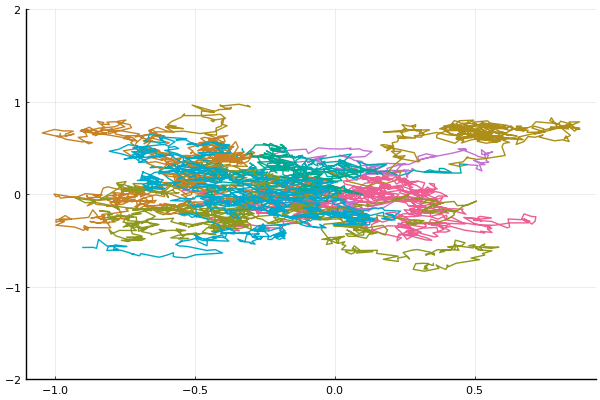

In [31]:
plot_data(tree1, 1, 2, ylim = (-2, 2), zlim = (-2.0, 2.0), legend = false, reuse = false, time = false)

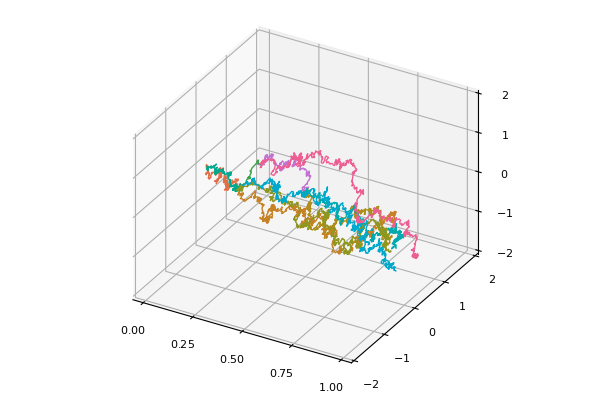

In [11]:
plot_data(tree1, 1, 3,  ylim = (-2, 2), zlim = (-2.0, 2.0), legend = false, reuse = false)

## Parameter change

### Change Trait mean

In [12]:
trait_mu2 = 2 .* ones(n)

# create trait dictionary
trait_parameters2 = Dict(11 => (alpha = trait_alpha1, mu = trait_mu1, sigma = trait_sigma1), 
                            8 => (alpha = trait_alpha1, mu = trait_mu2, sigma = trait_sigma1))

Dict{Int64, NamedTuple{(:alpha, :mu, :sigma), Tuple{Vector{Float64}, Vector{Float64}, Vector{Float64}}}} with 2 entries:
  11 => (alpha = [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], mu = [0.0, 0.0, 0.0, 0.0,…
  8  => (alpha = [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], mu = [2.0, 2.0, 2.0, 2.0,…

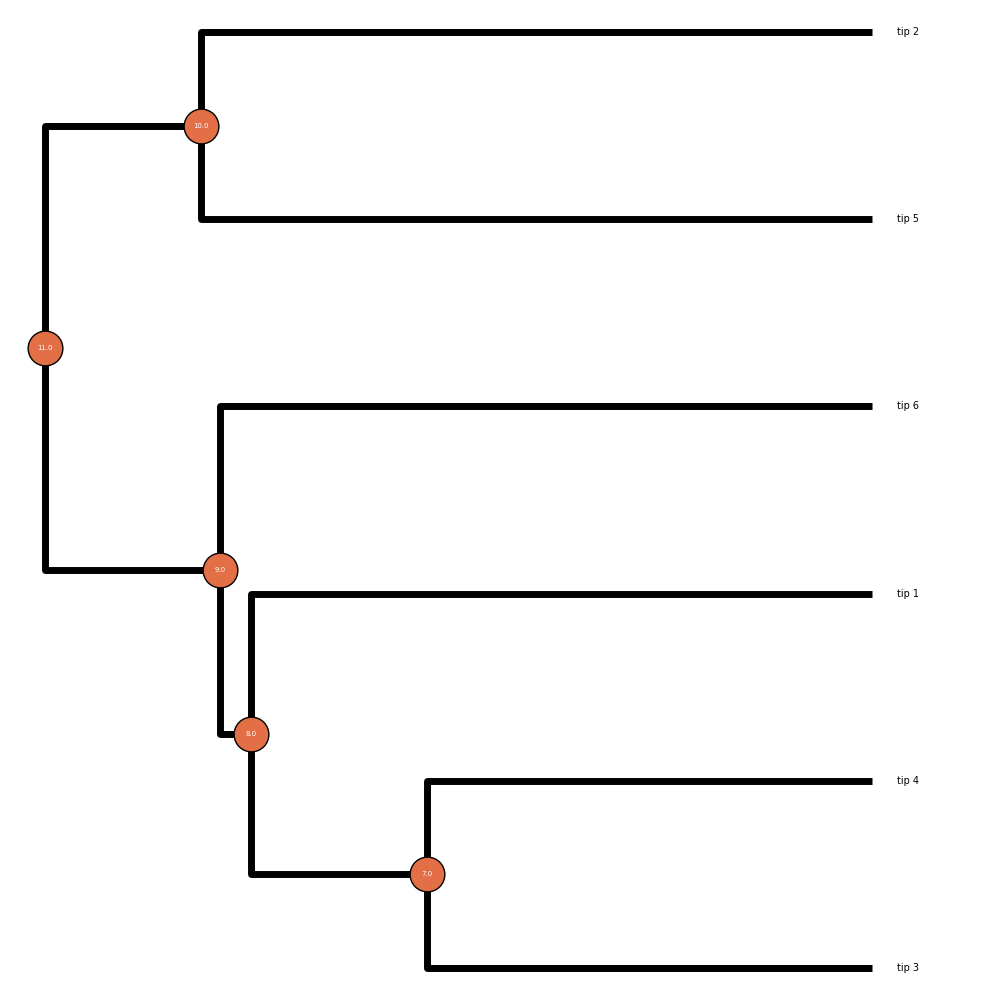

sys:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


In [13]:
plot_labelled(tree1)

In [14]:
sim2 = menura_para_descend!(mat_parameters, trait_parameters2, tree1, trait_evol_func, mat_evol_func, 0.0, trait_mu1, mat_mu1, false)

(RootedTree with 6 tips, 11 nodes and 10 branches.
Leaf names are tip 3, tip 4, tip 1, tip 6, tip 5 and tip 2
, [1.0460235879754458 1.3475671217574348 … 0.05988308765588076 -0.9400196658547217; 0.0999755905864512 0.8282728791828098 … 0.39861410117476653 0.07437899070179949; … ; 2.273663860164357 1.0684648792613078 … 0.15226610048962963 0.06639565289466483; -0.4124453556597631 1.0213430770830396 … -0.7263195761057492 -0.39671323146850934])

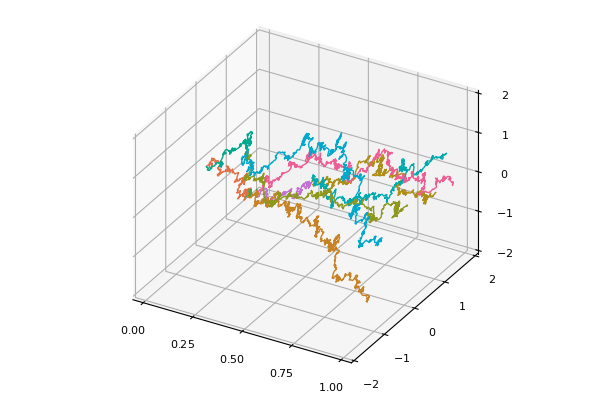

In [15]:
plot_data(tree1, 1, 2, ylim = (-2, 2), zlim = (-2.0, 2.0), legend = false, reuse = false)

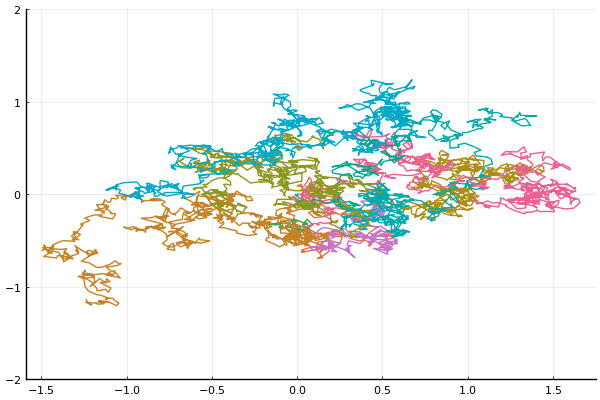

In [16]:
plot_data(tree1, 1, 2, ylim = (-2, 2), zlim = (-2.0, 2.0), legend = false, reuse = false, time = false)

┌ Info: Saved animation to c:\Users\coope\OneDrive\Documents\Uni\Phylogenetics_coding\JMMenura\tests\demo.gif
└ @ Plots C:\Users\coope\.julia\packages\Plots\rz1WP\src\animation.jl:156


Plots.AnimatedGif("c:\\Users\\coope\\OneDrive\\Documents\\Uni\\Phylogenetics_coding\\JMMenura\\tests\\demo.gif")
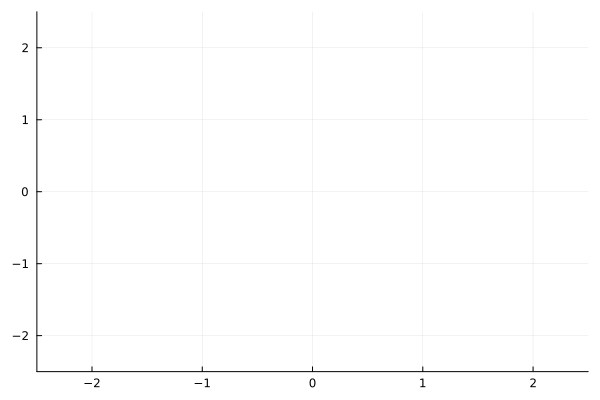

In [17]:
animate_data(tree1, 1, 2, "demo.gif", fps = 10)

┌ Info: Saved animation to c:\Users\coope\OneDrive\Documents\Uni\Phylogenetics_coding\JMMenura\tests\demo_3d.gif
└ @ Plots C:\Users\coope\.julia\packages\Plots\rz1WP\src\animation.jl:156


Plots.AnimatedGif("c:\\Users\\coope\\OneDrive\\Documents\\Uni\\Phylogenetics_coding\\JMMenura\\tests\\demo_3d.gif")
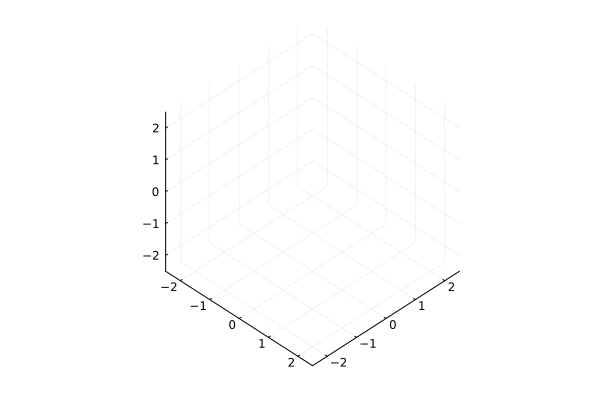

In [18]:
animate_data(tree1, 1, 2, 3, "demo_3d.gif", fps = 10)

## Approximate Bayesian Computation

### Set up smaller simulation

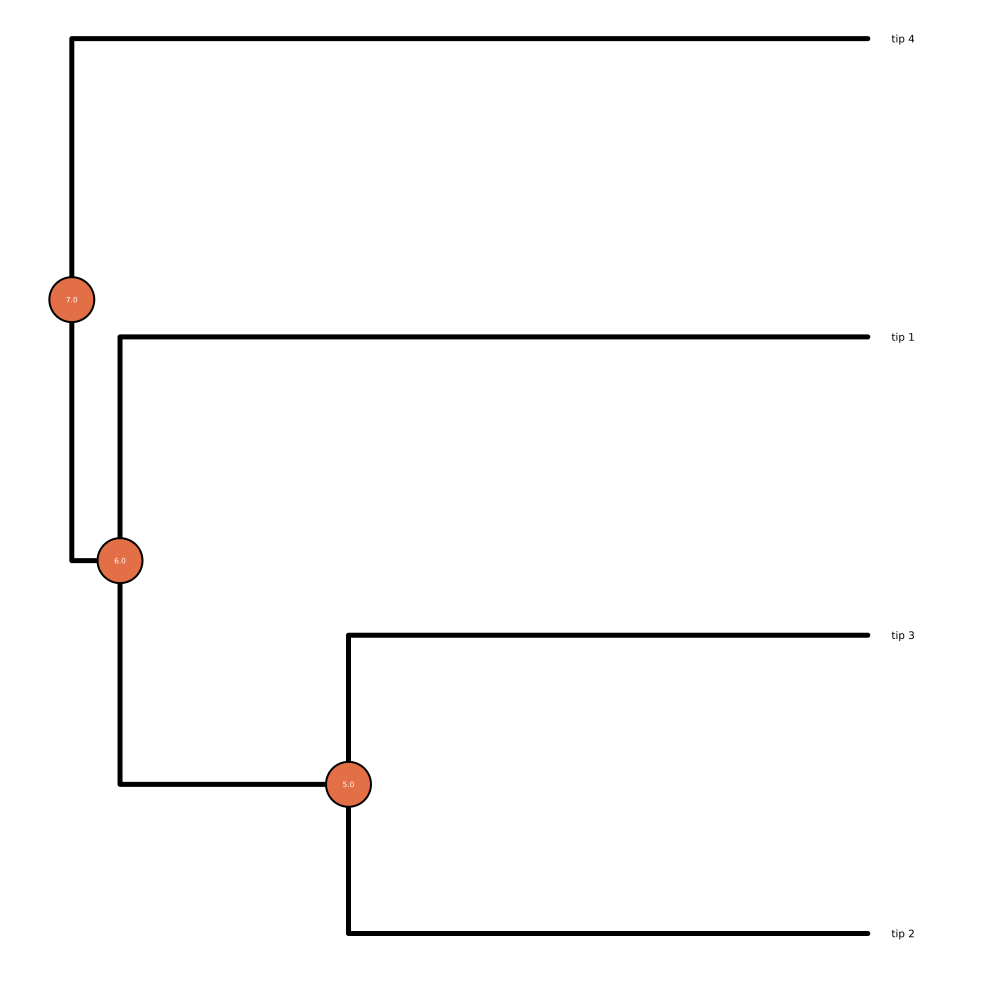

In [19]:
# number of traits
n3 = 3

# Creating tree
tree_type = Ultrametric(4)
Random.seed!(1)
tree3 = rand(tree_type)
time_tot = 1.0
tspan = (0.0, time_tot)

plot_labelled(tree3)

In [20]:
# G matrix
P3 = cor(rand(Wishart(100, Matrix(1I, n3, n3)  )))

3×3 Matrix{Float64}:
  1.0       -0.447957  -0.558309
 -0.447957   1.0       -0.49164
 -0.558309  -0.49164    1.0

In [21]:
# parameters needed to evolve traits
trait_alpha3 = repeat([1.0], n3)
trait_mu3 = repeat([0.0], n3)
trait_sigma3 = repeat([1.0], n3)

# create trait dictionary
trait_parameters3 = Dict(7 => (alpha = trait_alpha3, mu = trait_mu3, sigma = trait_sigma3))

Dict{Int64, NamedTuple{(:alpha, :mu, :sigma), Tuple{Vector{Float64}, Vector{Float64}, Vector{Float64}}}} with 1 entry:
  7 => (alpha = [1.0, 1.0, 1.0], mu = [0.0, 0.0, 0.0], sigma = [1.0, 1.0, 1.0])

In [22]:
# parameters needed to evolve G matrix
mat_alpha3 = 1 .* ones(n3,n3)
mat_sigma3 = (1 / sqrt(2) * 0.1) .* ones(n3,n3)
mat_mu3 = copy(P3)

# create matrix dictionary
mat_parameters3 = Dict(7 => (alpha = mat_alpha3, mu = mat_mu3, sigma = mat_sigma3))

Dict{Int64, NamedTuple{(:alpha, :mu, :sigma), Tuple{Matrix{Float64}, Matrix{Float64}, Matrix{Float64}}}} with 1 entry:
  7 => (alpha = [1.0 1.0 1.0; 1.0 1.0 1.0; 1.0 1.0 1.0], mu = [1.0 -0.447957 -0…

### Priors

In [23]:
α_priors = [Gamma(2,0.25), Gamma(2,0.25)]

2-element Vector{Gamma{Float64}}:
 Gamma{Float64}(α=2.0, θ=0.25)
 Gamma{Float64}(α=2.0, θ=0.25)

### Create reference data

In [24]:
ther_ref_sim = menura_para_descend!(mat_parameters3, trait_parameters3, tree3, trait_evol_func, mat_evol_func, 0.0, trait_mu3, P3, false)

ther_ref_data = get_data(ther_ref_sim[1])

48×1 Matrix{Float64}:
 -1.0592916188421813
  0.8182290968690955
  0.33254205685264265
  0.6944202634383522
 -0.5244291931739904
 -0.23639620282050577
 -0.39740177050045805
 -0.05448611958269594
  0.45667912853844395
  0.282263826385761
  ⋮
  0.9986500465460102
 -0.42009569313053186
 -0.5797834408488494
 -0.42009569313053186
  0.9221840037434456
 -0.4481885902114741
 -0.5797834408488494
 -0.4481885902114741
  0.9791256404919749

### Running ABC

In [25]:
parameters = JMMABCAlphaEqualConstant(Gamma(2,0.25), trait_mu3, trait_sigma3, Gamma(2,0.25), mat_mu3, mat_sigma3, n3)
mat_start = cor(rand(Wishart(100, Matrix(1I, n3, n3)  )))

3×3 Matrix{Float64}:
  1.0       -0.614411  -0.465614
 -0.614411   1.0       -0.412165
 -0.465614  -0.412165   1.0

In [26]:
out = menura_bayesian(ther_ref_data, tree3, parameters, trait_mu3, P3, 120.0, 40)

┌ Info: GpABC rejection simulation. ϵ = 120.0.
└ @ GpABC C:\Users\coope\.julia\packages\GpABC\o0EN1\src\abc\rejection.jl:47


GpABC.SimulatedABCRejectionOutput(2, 40, 891, 120.0, [0.04905338387823334 0.6986505537104019; 1.496702703055861 0.7838332242118903; … ; 1.1296397289736841 0.0712561642754345; 0.2719732345585697 0.3259369553537029], [108.49308224039714, 116.9131220254216, 118.52320162763718, 117.60047259802941, 110.66882501802247, 116.96030726896055, 117.58405930615784, 117.13908118860891, 115.39262991695156, 118.40952584095935  …  116.10002413872742, 119.29285235217802, 119.08598961044014, 119.37933058814598, 119.83092117106645, 109.84490424156034, 119.60784120225603, 108.69648489071896, 117.81311094225661, 119.94670344690947], [0.0122758165818894, 0.000913437260142551, 0.01945376044146753, 0.008557752034952942, 0.024584262496096243, 0.005327541827328071, 0.01470034146926371, 0.011438096037884616, 0.04737649635828356, 0.03847434274424796  …  0.015386819480692005, 0.010392752346926092, 0.03737021925352851, 0.04280157916590646, 0.036910168235902464, 0.006811132376729421, 0.03328476668438794, 0.0328864328

In [27]:
out2 = menura_bayesian(ther_ref_data, tree3, parameters, trait_mu3, P3, 120.0, 1000)

┌ Info: GpABC rejection simulation. ϵ = 120.0.
└ @ GpABC C:\Users\coope\.julia\packages\GpABC\o0EN1\src\abc\rejection.jl:47


┌ Info: GpABC rejection simulation. Accepted 49/1000 particles.
└ @ GpABC C:\Users\coope\.julia\packages\GpABC\o0EN1\src\abc\rejection.jl:87


┌ Info: GpABC rejection simulation. Accepted 84/2000 particles.
└ @ GpABC C:\Users\coope\.julia\packages\GpABC\o0EN1\src\abc\rejection.jl:87


┌ Info: GpABC rejection simulation. Accepted 124/3000 particles.
└ @ GpABC C:\Users\coope\.julia\packages\GpABC\o0EN1\src\abc\rejection.jl:87


┌ Info: GpABC rejection simulation. Accepted 167/4000 particles.
└ @ GpABC C:\Users\coope\.julia\packages\GpABC\o0EN1\src\abc\rejection.jl:87


┌ Info: GpABC rejection simulation. Accepted 213/5000 particles.
└ @ GpABC C:\Users\coope\.julia\packages\GpABC\o0EN1\src\abc\rejection.jl:87


┌ Info: GpABC rejection simulation. Accepted 275/6000 particles.
└ @ GpABC C:\Users\coope\.julia\packages\GpABC\o0EN1\src\abc\rejection.jl:87


┌ Info: GpABC rejection simulation. Accepted 314/7000 particles.
└ @ GpABC C:\Users\coope\.julia\packages\GpABC\o0EN1\src\abc\rejection.jl:87


┌ Info: GpABC rejection simulation. Accepted 368/8000 particles.
└ @ GpABC C:\Users\coope\.julia\packages\GpABC\o0EN1\src\abc\rejection.jl:87


┌ Info: GpABC rejection simulation. Accepted 415/9000 particles.
└ @ GpABC C:\Users\coope\.julia\packages\GpABC\o0EN1\src\abc\rejection.jl:87


┌ Info: GpABC rejection simulation. Accepted 454/10000 particles.
└ @ GpABC C:\Users\coope\.julia\packages\GpABC\o0EN1\src\abc\rejection.jl:87


┌ Info: GpABC rejection simulation. Accepted 500/11000 particles.
└ @ GpABC C:\Users\coope\.julia\packages\GpABC\o0EN1\src\abc\rejection.jl:87
┌ Info: GpABC rejection simulation. Accepted 541/12000 particles.
└ @ GpABC C:\Users\coope\.julia\packages\GpABC\o0EN1\src\abc\rejection.jl:87


┌ Info: GpABC rejection simulation. Accepted 586/13000 particles.
└ @ GpABC C:\Users\coope\.julia\packages\GpABC\o0EN1\src\abc\rejection.jl:87


┌ Info: GpABC rejection simulation. Accepted 627/14000 particles.
└ @ GpABC C:\Users\coope\.julia\packages\GpABC\o0EN1\src\abc\rejection.jl:87
┌ Info: GpABC rejection simulation. Accepted 674/15000 particles.
└ @ GpABC C:\Users\coope\.julia\packages\GpABC\o0EN1\src\abc\rejection.jl:87


┌ Info: GpABC rejection simulation. Accepted 705/16000 particles.
└ @ GpABC C:\Users\coope\.julia\packages\GpABC\o0EN1\src\abc\rejection.jl:87


┌ Info: GpABC rejection simulation. Accepted 755/17000 particles.
└ @ GpABC C:\Users\coope\.julia\packages\GpABC\o0EN1\src\abc\rejection.jl:87
┌ Info: GpABC rejection simulation. Accepted 803/18000 particles.
└ @ GpABC C:\Users\coope\.julia\packages\GpABC\o0EN1\src\abc\rejection.jl:87


┌ Info: GpABC rejection simulation. Accepted 842/19000 particles.
└ @ GpABC C:\Users\coope\.julia\packages\GpABC\o0EN1\src\abc\rejection.jl:87


┌ Info: GpABC rejection simulation. Accepted 884/20000 particles.
└ @ GpABC C:\Users\coope\.julia\packages\GpABC\o0EN1\src\abc\rejection.jl:87


┌ Info: GpABC rejection simulation. Accepted 929/21000 particles.
└ @ GpABC C:\Users\coope\.julia\packages\GpABC\o0EN1\src\abc\rejection.jl:87


┌ Info: GpABC rejection simulation. Accepted 971/22000 particles.
└ @ GpABC C:\Users\coope\.julia\packages\GpABC\o0EN1\src\abc\rejection.jl:87


GpABC.SimulatedABCRejectionOutput(2, 1000, 22702, 120.0, [0.08688534333447577 1.0355710170935681; 0.6022293473275634 0.8085065491283462; … ; 0.7094807222367602 0.30168488296566265; 0.505783978060914 0.3102519336247055], [116.54596081402686, 119.8675728219084, 118.1976094586012, 116.6292827529195, 119.38781638897864, 119.48338693285305, 119.76313820650589, 118.53807689566842, 119.72585856110072, 119.09184878069121  …  118.07551464009151, 119.17974703688185, 118.50091879047109, 119.43705530727263, 118.45066489086008, 116.63814591151181, 119.69712328973948, 113.61280653311387, 117.28227677071806, 117.75252423704157], [0.0002682366620798598, 0.000458188661621393, 0.002233446729837991, 7.768350901673274e-5, 0.0002585300480462335, 0.00020377968244169716, 0.0011488419749421746, 0.0011139057399621557, 3.88486253923225e-5, 0.0014367745202499551  …  0.0014104526653014294, 0.0008947857031160471, 9.536919877603272e-5, 0.0008448034331101904, 0.002118209559759098, 0.0002699847661984055, 3.7057794139

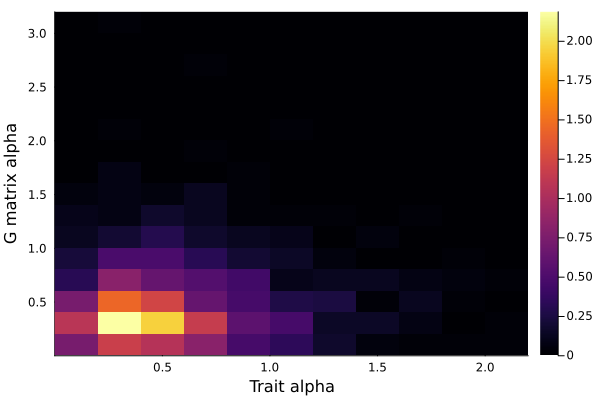

In [28]:
x = out.population[:,1]
y = out.population[:,2]
append!(x, out2.population[:,1])
append!(y, out2.population[:,2])
histogram2d(x, y, normalize = :pdf, show_empty_bins = true, xlab = "Trait alpha", ylab = "G matrix alpha")

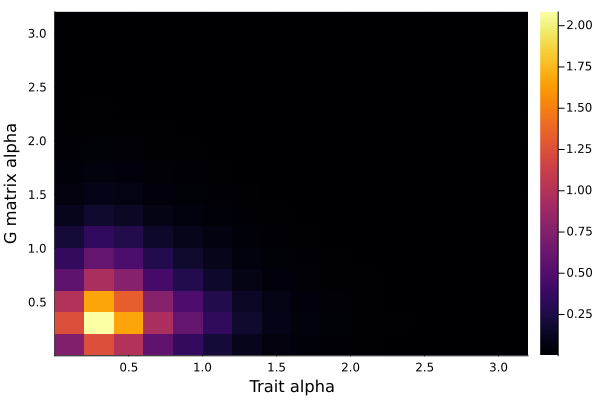

In [29]:
points = [[i,j] for i in 0.05:0.01:3 for j in 0.05:0.01:3]
ws = [pdf(Gamma(2,0.25), point[1])*pdf(Gamma(2,0.25), point[2]) for point in points]
xs = [point[1] for point in points]
ys = [point[2] for point in points]
histogram2d(xs, ys, weights = ws, normalize = :pdf, xlab = "Trait alpha", ylab = "G matrix alpha")

## Real Data

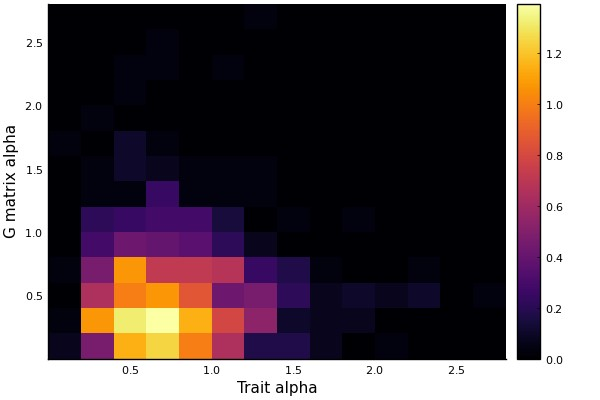